# Detection Edge and applayin image filters

We will learn how to use fundamental image processing operators. We are going to discuss edge detection and how we can use image filters to apply various effects on photos.

By the end of this chapter, you will know: 

    • What is 2D convolution and how to use it 

    • How to blur an image 
    
    • How to detect edges in an image 
    
    • How to apply motion blur to an image 
    
    • How to sharpen and emboss an image 
    
    • How to erode and dilate an image 
    
    • How to create a vignette filter 
    
    • How to enhance image contrast


# 2D Convolution 

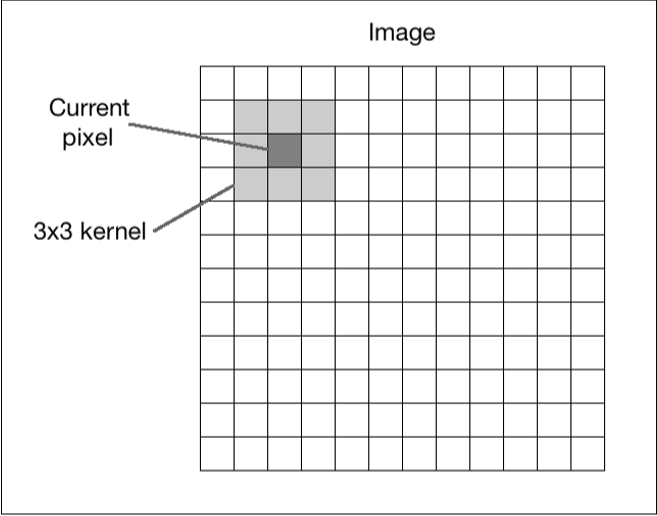

# Blurring or low pass filtering operation 

In [6]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

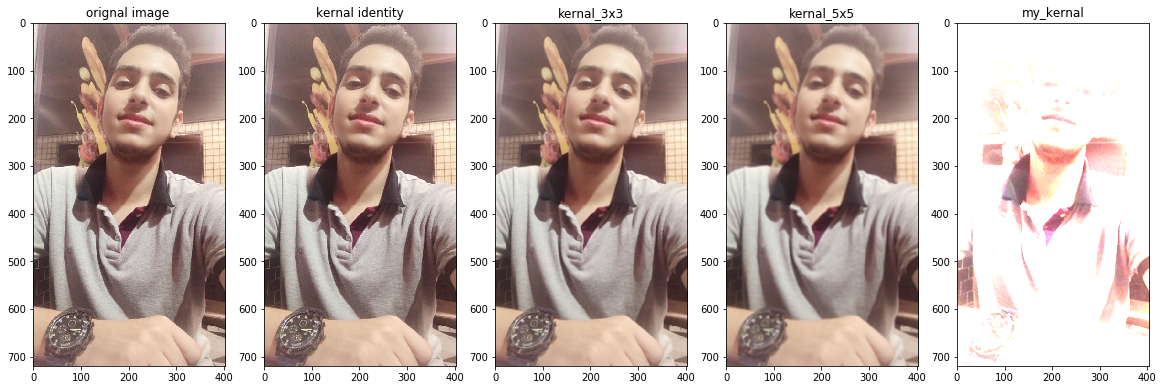

In [10]:
image = cv2.imread('E:\\computer vision\\Day1\\3.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

kernal_identity = np.array([[0,0,0],[0,1,0],[0,0,0]])

kernal_3x3      = np.ones((3,3),np.float32)/9.0

kernal_5x5      = np.ones((5,5),np.float32)/25.0

my_kernal       = np.array([[1,0,0],[0,1,0],[0,0,1]])


o_my  = cv2.filter2D(image,-1,my_kernal)

o_identity = cv2.filter2D(image,-1,kernal_identity)

o_3x3 = cv2.filter2D(image,-1,kernal_3x3)

o_5x5 = cv2.filter2D(image,-1,kernal_5x5)


f,(ax1 , ax2 , ax3 , ax4 , ax5 ) = plt.subplots(1,5,figsize=(20,10))

ax1.set_title('orignal image ')
ax1.imshow(image)

ax2.set_title('kernal identity')
ax2.imshow(o_identity)

ax3.set_title('kernal_3x3')
ax3.imshow(o_3x3)

ax4.set_title('kernal_5x5')
ax4.imshow(o_5x5)

ax5.set_title('my_kernal')
ax5.imshow(o_my)

# The size of the kernel versus the blurriness

In the preceding code, we are generating different kernels in the code which are kernel_identity, kernel_3x3, and kernel_5x5.
We use the function, filter2D,  to apply these kernels to the input image. If you look at the images carefully, you can see that they keep getting blurrier as we increase the kernel size. The reason for this is because when we increase the kernel size, we are averaging over a larger area.  This tends to have a larger blurring effect.

## Edge detection or  high pass filtering operation


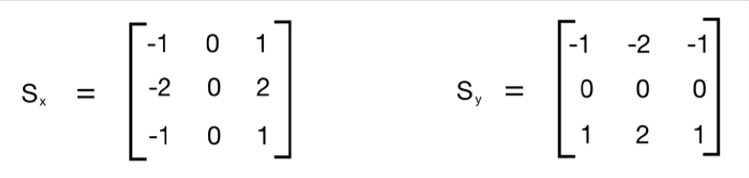

The kernel on the left detects horizontal edges and the kernel on the right detects vertical edges. OpenCV provides a function to directly apply the Sobel filter to a given image. Here is the code to use Sobel filters to detect edges:

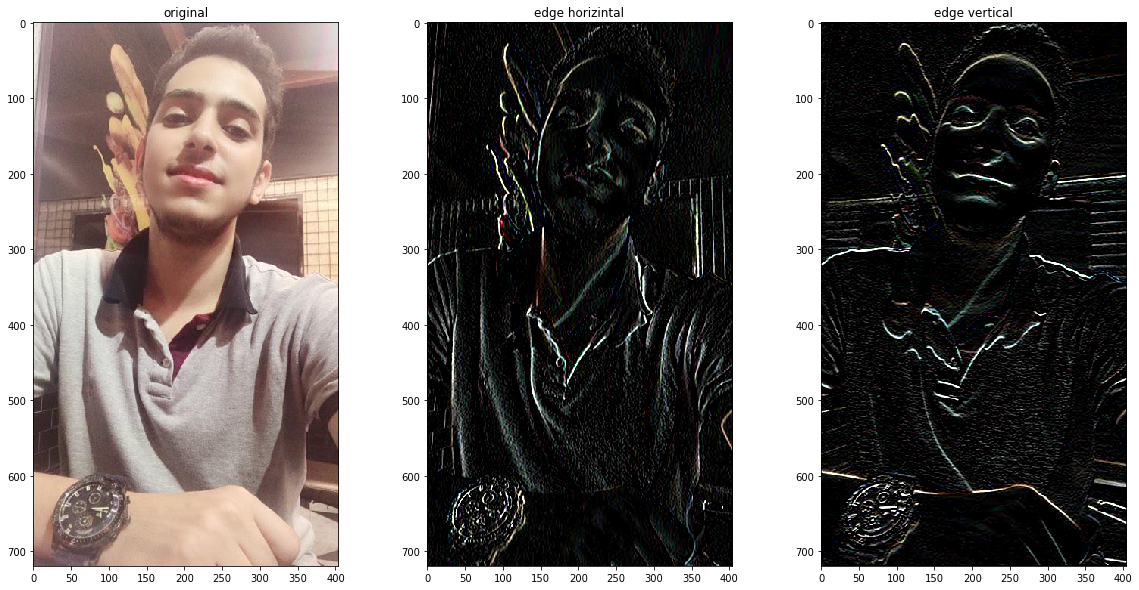

In [23]:
sobel_hor_3x3 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_ver_3x3 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

edge_hor_3x3 = cv2.filter2D(image,-1,sobel_hor_3x3)
edge_ver_3x3 = cv2.filter2D(image,-1,sobel_ver_3x3)

f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))

ax1.set_title('original')
ax1.imshow(image)

ax2.set_title('edge horizintal')
ax2.imshow(edge_hor_3x3)

ax3.set_title('edge vertical')
ax3.imshow(edge_ver_3x3)

# or using cany edge detection 

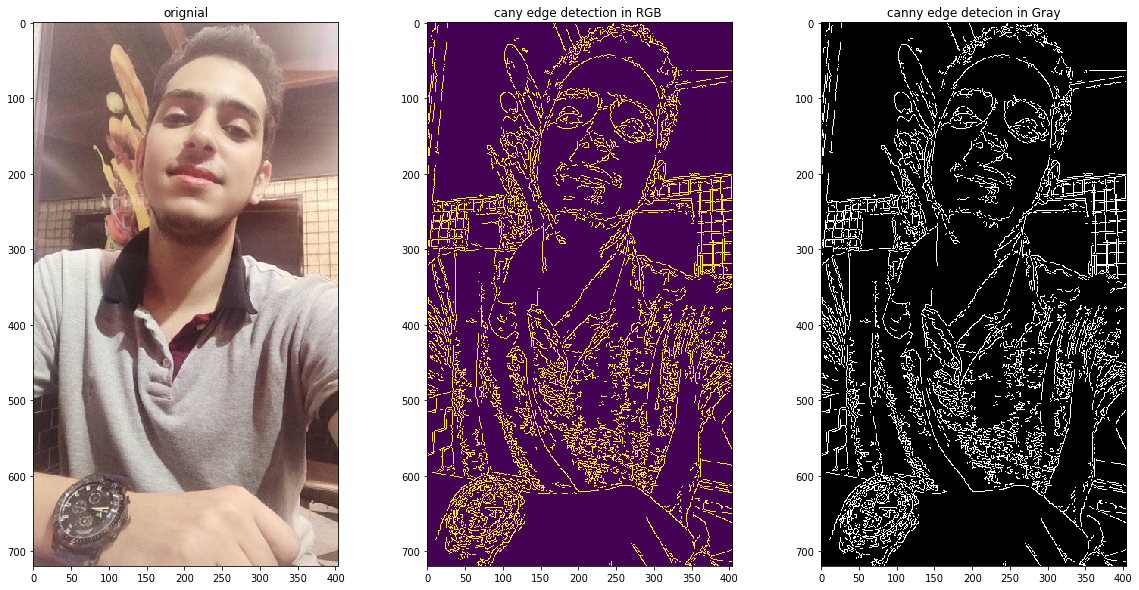

In [21]:
edge_canny = cv2.Canny(image,50,120)

gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
edge_canny_gray=cv2.Canny(gray,50,120)

f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))

ax1.set_title('orignial')
ax1.imshow(image)

ax2.set_title('cany edge detection in RGB ')
ax2.imshow(edge_cany)

ax3.set_title('canny edge detecion in Gray')
ax3.imshow(edge_canny_gray,cmap='gray')